In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

d:\github\quantum-tests\venv\Lib\site-packages\qiskit\visualization\circuit\circuit_visualization.py:611: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  qcimg = _latex.QCircuitImage(


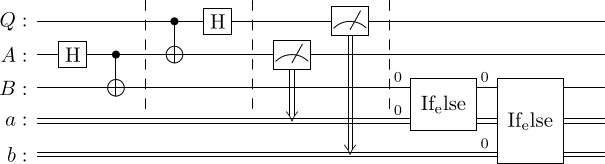

In [4]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measure & send
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses classical bits
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw("latex"))

In [10]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())

array([[ 0.4759946 +0.j        , -0.34313747+0.80974429j],
       [-0.43424141-0.76476371j, -0.47281799+0.05490005j]])

d:\github\quantum-tests\venv\Lib\site-packages\qiskit\visualization\circuit\circuit_visualization.py:611: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  qcimg = _latex.QCircuitImage(


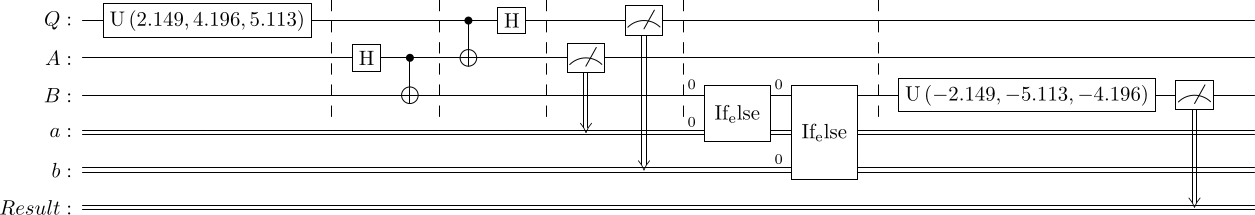

In [14]:
test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

test.append(random_gate, qubit)
test.barrier()

test = test.compose(protocol)
test.barrier()

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw("latex"))

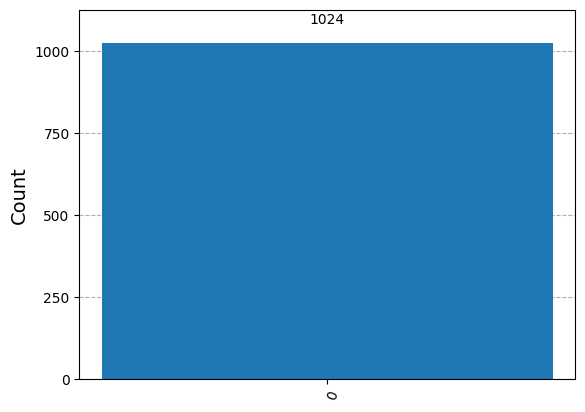

In [28]:
result = AerSimulator().run(test).result()
stats = result.get_counts()
filtered_stats = marginal_distribution(stats, [2])
display(plot_histogram(filtered_stats))